# Membership cost
This notebook explores the expected membership cost from the survey

In [1]:
# %load_ext quak
# pip install qucak #widget for table overview

In [1]:
import textwrap

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/survey2024.csv")

In [3]:
df.head()

,Timestamp,What is your gender?,What is your age group?,Which of these describe your position? Choose all options that apply.,Are you currently in a permanent position?,In which of these sector(s) do you work?,What is your location?,Q1: How would you describe your work? Choose all options that apply.,Q2: Which of the following do you work in? Choose all options that apply.,"Q3: Where do bioimage analysts ""sit"" in your institution? Choose all options that apply.",...,Q18: What other aspects beside the opportunities listed above would make you most likely to contribute to GloBIAS?,Q19: Would you be interested to contribute to the foundation process of GloBIAS during 2024?,Q20: Which of these social media platforms do you use in a professional context? (Select all that apply),Q21: Which of these tools do you use in a professional context? \nUsed mainly for [image.sc],Q21: Which of these tools do you use in a professional context? \nUsed mainly for [Google groups],Q21: Which of these tools do you use in a professional context? \nUsed mainly for [GitHub],Q21: Which of these tools do you use in a professional context? \nUsed mainly for [Wikipedia],Q21: Which of these tools do you use in a professional context? \nUsed mainly for [ChatGPT/BING/Bard],"Q21: Which of these tools do you use in a professional context? \nUsed mainly for [Monographs, e.g. library or online books]",Q22: Interested in getting involved now? If your answer is Yes to any of the questions below please send a short email to info@globias.org using GloBIAS A and/or B in the email topic. Thank you.
0,2/7/2024 15:02:45,Male,30-39,staff scientist in a core facility,Yes,"research institution, university",Europe,"Life sciences research (planning, executing an...","a university based core facility, a non-profit...",within individual research labs with wet-lab f...,...,"open channels for communication, opportunities...",No,"ResearchGate, Linkedin, YouTube",posting questions,NaN,"exchanging ideas, self-learning, other","finding literature, self-learning","self-learning, other",NaN,I would be interested to get regular updates r...
1,2/7/2024 16:44:49,Female,20-29,PhD student,No,research institution,Europe,"Life sciences research (planning, executing an...",an university based academic/ research lab,a dedicated stand-alone image analysis facilit...,...,"open channels for communication, alignment wit...",No,"ResearchGate, Linkedin, X (Twitter)",NaN,NaN,other,self-learning,"posting questions, self-learning","finding literature, self-learning",NaN
2,2/7/2024 17:32:37,Prefer not to say,above 50,professor,No,research institution,South America,"Life sciences research (planning, executing an...",a non-profit/research centre based academic/re...,within individual research labs with wet-lab f...,...,"events held online, open channels for communic...",Yes (please see also Q22),"ResearchGate, Linkedin, X (Twitter)",NaN,NaN,finding literature,"finding literature, self-learning","posting questions, self-learning","finding literature, self-learning",I would be interested to get regular updates r...
3,2/7/2024 20:31:45,Female,20-29,PhD student,No,"research institution, university",Europe,"Life sciences research (planning, executing an...",an university based academic/ research lab,within individual research labs with wet-lab f...,...,opportunities for training,Yes (please see also Q22),"ResearchGate, Linkedin, X (Twitter)","posting questions, self-learning",NaN,"finding literature, self-learning","finding literature, self-learning",posting questions,"finding literature, posting questions, exchang...",I would be interested to get regular updates r...
4,2/7/2024 20:33:15,Male,30-39,postdoctoral researcher,No,university,Europe,Imaging support (guidelines and tips for sampl...,an university based academic/ research lab,within individual research labs with wet-lab f...,...,"open channels for communication, alignment wit...",No,"ResearchGate, Slack, YouTube, X (Twitter)","finding literature, pos

# Check amount willing to pay for memebership

In [5]:
willing_to_pay_df = df.iloc[:, 39].copy()

In [6]:
# Get data, and replace nan with "No answer"
willing_to_pay = np.where(pd.isnull(willing_to_pay_df), "No answer", willing_to_pay_df)

In [7]:
unique_values, counts = np.unique(willing_to_pay, return_counts=True)

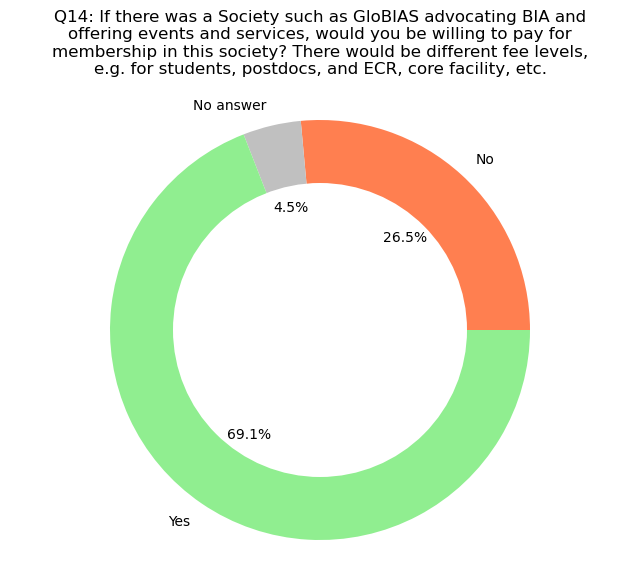

In [8]:
# Set colors based on label
colors = [
    "lightgreen" if value == "Yes" else "coral" if value == "No" else "silver"
    for value in unique_values
]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=unique_values, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.gca().add_artist(
    plt.Circle((0, 0), 0.7, fc="white")
)  # Add a white circle in the center for the hole
plt.title("\n".join(textwrap.wrap(willing_to_pay_df.name, width=64)) + "\n")
plt.savefig("../figures/WillingToPay.png", bbox_inches="tight")
plt.savefig("../figures/WillingToPay.svg", bbox_inches="tight")
plt.show()

# Check suggested value

In [4]:
value_df = df.iloc[:, 40].copy()

In [10]:
# Check our unique values
for value in value_df.unique():
    print(value)

180
25
120
50
100
nan
200
60
20
50-100
300
15
6
40
30
80
5-25
55
35
167.02
150
10
200 to 500
0
400
90
75
350
230
70
45
250
109
7
33
110
62.5
30 PhD student/35 postdocs / 50 PI /70 industry
37.5
17.5
5


In [5]:
# As of 05/05/2024, some clean up is needed (strings are present)
# for now just doing dome intuitive ballpark replacement

value_df.replace("50-100", 75, inplace=True)
value_df.replace("5-25", 15, inplace=True)
value_df.replace("200 to 500", 300, inplace=True)
value_df.replace("30 PhD student/35 postdocs / 50 PI /70 industry", 45, inplace=True)

# Now get data in float
value_df = value_df.astype(float)

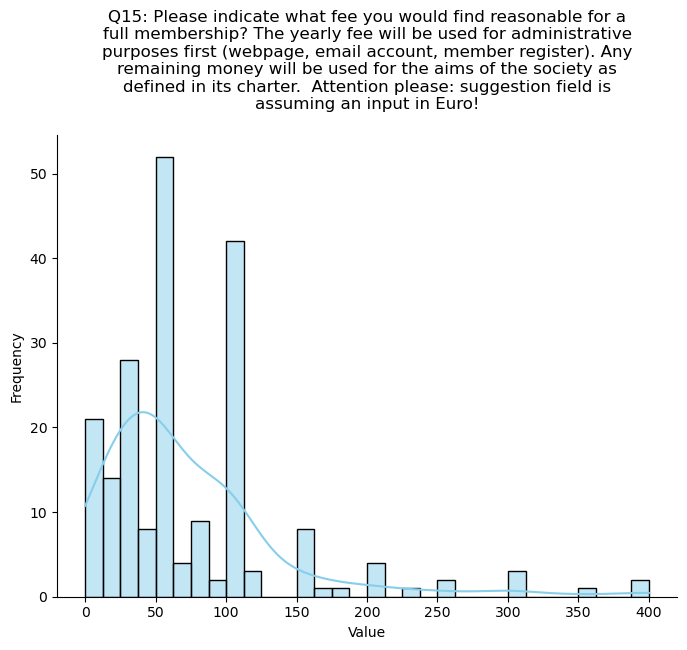

Mean value: 72.79
Median value: 50.00


In [12]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(value_df, bins=32, color="skyblue", kde=True)
plt.title("Histogram for value distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("\n".join(textwrap.wrap(value_df.name, width=64)) + "\n")

# Remove top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.savefig("../figures/MembershipFeeHistogram.png", bbox_inches="tight")
plt.savefig("../figures/MembershipFeeHistogram.svg", bbox_inches="tight")


plt.show()
print(f"Mean value: {np.nanmean(value_df):.2f}")
print(f"Median value: {np.nanmedian(value_df):.2f}")

# Value vs position

In [13]:
position_df = df.iloc[:, 3].copy()
position_df.head()

0    staff scientist in a core facility
1                           PhD student
2                             professor
3                           PhD student
4               postdoctoral researcher
Name: Which of these describe your position? Choose all options that apply., dtype: object

In [14]:
value_df.value_counts()

Q15: Please indicate what fee you would find reasonable for a full membership? The yearly fee will be used for administrative purposes first (webpage, email account, member register). Any remaining money will be used for the aims of the society as defined in its charter. \nAttention please: suggestion field is assuming an input in Euro!\n
50.00     47
100.00    40
30.00     15
25.00     11
20.00     10
10.00     10
0.00       8
150.00     8
75.00      7
60.00      4
40.00      4
200.00     4
15.00      3
45.00      3
70.00      3
120.00     3
300.00     3
90.00      2
400.00     2
80.00      2
250.00     2
110.00     1
62.50      1
37.50      1
33.00      1
7.00       1
109.00     1
17.50      1
180.00     1
230.00     1
350.00     1
167.02     1
35.00      1
55.00      1
6.00       1
5.00       1
Name: count, dtype: int64

In [15]:
position_value_df = pd.concat([position_df, value_df])
position_value_df = pd.DataFrame(
    {
        "position": position_df,
        "value": value_df,
    }
)

In [16]:
position_value_df.head()

,position,value
0,staff scientist in a core facility,180.0
1,PhD student,25.0
2,professor,120.0
3,PhD student,50.0
4,postdoctoral researcher,100.0


In [17]:
counts = position_df.value_counts()

# Define your threshold for filtering
threshold = 5

# Filter out values with counts less than the threshold
filtered_values = counts[counts >= threshold].index

# Filter the DataFrame to keep only rows with 'Name' in filtered_values
position_value_filtered_df = position_value_df[
    position_value_df["position"].isin(filtered_values)
]

position_value_filtered_df.head()

,position,value
0,staff scientist in a core facility,180.0
1,PhD student,25.0
2,professor,120.0
3,PhD student,50.0
4,postdoctoral researcher,100.0


C:\Users\Martin\AppData\Local\Temp\ipykernel_10836\2972568914.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")


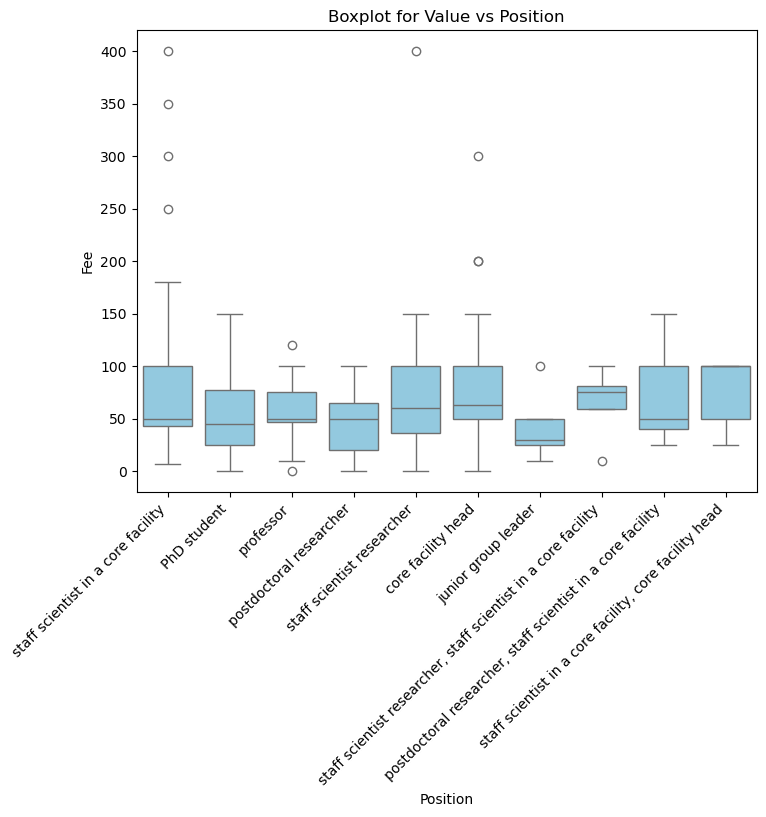

In [18]:
# Plot the boxplot
plt.figure(figsize=(8, 6))
chart = sns.boxplot(
    position_value_filtered_df,
    x="position",
    y="value",
    color="skyblue",
)
plt.title("Boxplot for Value vs Position")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.xlabel("Position")
plt.ylabel("Fee")


plt.savefig("../figures/MembershipFeePositionBoxplot.png", bbox_inches="tight")
plt.savefig("../figures/MembershipFeePositionBoxplot.svg", bbox_inches="tight")

In [19]:
table = pd.pivot_table(
    position_value_filtered_df,
    values="value",
    index="position",
    aggfunc={"value": ["median", "mean"]},
)
table

,mean,median
position,,
PhD student,52.391304,45.0
core facility head,82.772727,62.5
junior group leader,43.000000,30.0
postdoctoral researcher,48.518519,50.0
"postdoctoral researcher, staff scientist in a core facility",73.000000,50.0
professor,55.937500,50.0
staff scientist in a core facility,88.500000,50.0
"staff scientist in a core facility, core facility head",75.000000,100.0
staff scientist researcher,88.200000,60.0


# Value vs where they work at

Is there a relation betwen where people work and the fee proposed.

In [21]:
selected_df = df[['Q15: Please indicate what fee you would find reasonable for a full membership? The yearly fee will be used for administrative purposes first (webpage, email account, member register). Any remaining money will be used for the aims of the society as defined in its charter. \nAttention please: suggestion field is assuming an input in Euro!\n',
         'In which of these sector(s) do you work?']].copy()
selected_df.columns = ["fee", "sector"]
selected_df.dropna(inplace=True)

selected_df["fee"] = selected_df["fee"].replace("50-100", 75)
selected_df["fee"] = selected_df["fee"].replace("5-25", 15)
selected_df["fee"] = selected_df["fee"].replace("200 to 500", 300)
selected_df["fee"] = selected_df["fee"].replace("30 PhD student/35 postdocs / 50 PI /70 industry", 45)

# Now get data in float
selected_df["fee"] = selected_df["fee"].astype(float)

C:\Users\aguco599\AppData\Local\Temp\ipykernel_224\2247439792.py:1: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  axes = sns.stripplot(data=selected_df,
C:\Users\aguco599\AppData\Local\Temp\ipykernel_224\2247439792.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=70)


[Text(0, 0, 'research institution, university'),
 Text(1, 0, 'research institution'),
 Text(2, 0, 'university'),
 Text(3, 0, 'research institution, company'),
 Text(4, 0, 'company'),
 Text(5, 0, 'university, company, self employed')]

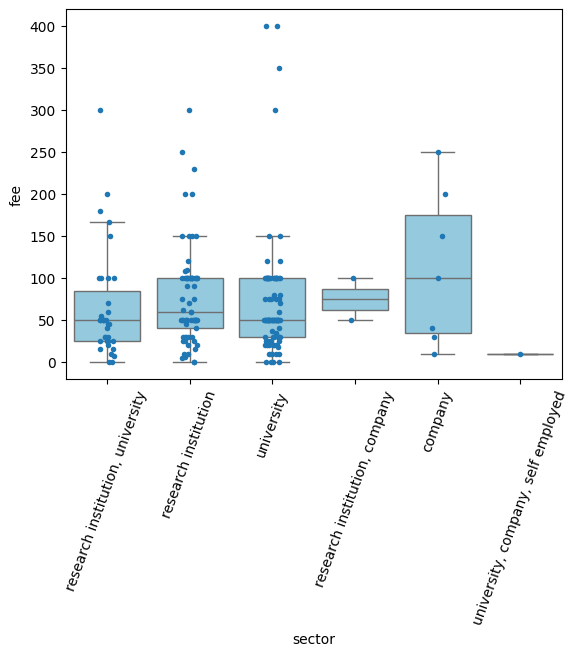

In [34]:
axes = sns.stripplot(data=selected_df,
                    x="sector",
                    y="fee",
                    size=4,
                    edgecolor="gray",
                    )

sns.boxplot(data=selected_df,
            x="sector",
            y="fee",
            color="skyblue",
            fliersize=0, 
            ax=axes)

axes.set_xticklabels(axes.get_xticklabels(), rotation=70)